X_train_glove_link :- https://drive.google.com/file/d/1Y6Y7IWu8O6iKGJjgbCwkVfoelwr-nAgZ/view?usp=sharing

X_test_glove_link:- https://drive.google.com/file/d/1yP277ctI78aEumnRayVwZeggidCaYiXw/view?usp=sharing

<h1 style="text-align:center;font-size:30px;" > Quora Question Pair Similarity </h1>

## 1. Description

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

## 2. Problem Statement
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are predicting whether a pair of questions are duplicates or not.

## 3. Data 

- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290

### Importing neccesssary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
from google.colab import drive
drive.mount('/content/grive') 

Mounted at /content/grive


In [4]:
df = pd.read_csv('/content/grive/MyDrive/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### Statistical Analysis

In [7]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


### Finding and dropping Null values

In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)] # null items in the dataset

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [10]:
df=df.dropna()

In [11]:
df[df.isnull().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate


In [12]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [13]:
df.shape

(404287, 6)

# ***Exploratory Data Analysis    (EDA)***

## ***Distribution of data points among output classes***

*   Number of duplicate(smilar) and non-duplicate(non similar) questions



---




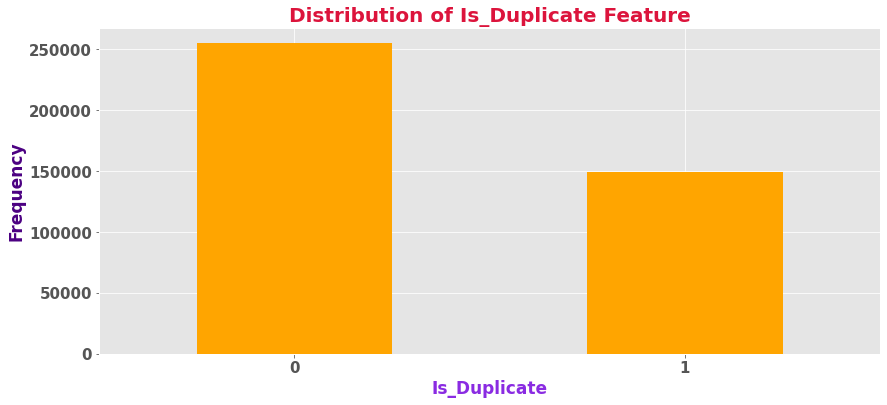

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
df['is_duplicate'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.xlabel('Is_Duplicate',fontsize=17, fontweight='bold', color='blueviolet')
plt.title('Distribution of Is_Duplicate Feature',fontsize=20, fontweight='bold', color='crimson')
plt.ylabel('Frequency', fontsize=17, fontweight='bold', color='indigo')
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.show();

### ***Number of Unique Questions***

In [15]:
#Creating a dataframe that contains the question id of both quid1 and quid2
qids = pd.Series(list(df['qid1']) + list(df['qid2'])) 
unique_qs = len(np.unique(qids))  #Numpy array to filter down all unique ques
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))

# Counts any question that have been repeated more than one time
qs_morethan_onetime = np.sum(qids.value_counts() > 1)  

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,round(qs_morethan_onetime/unique_qs*100,2)))

# Taking the frequency of all question and printing the max of them
print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()
print(q_vals)


Total number of  Unique Questions are: 537929

Number of unique questions that appear more than one time: 111778 (20.78%)

Max number of times a single question is repeated: 157

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537929, dtype: int64


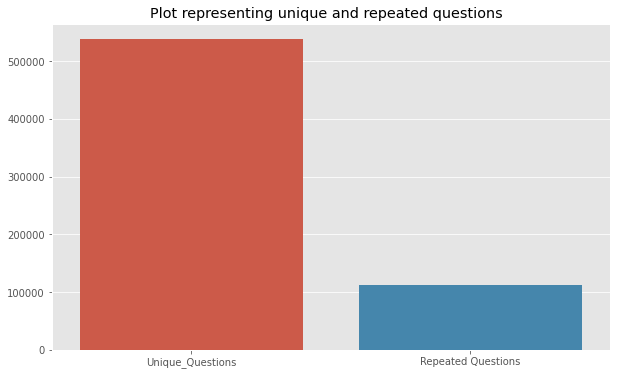

In [16]:
x = ["Unique_Questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

Maximum number of times a single question is repeated: 157



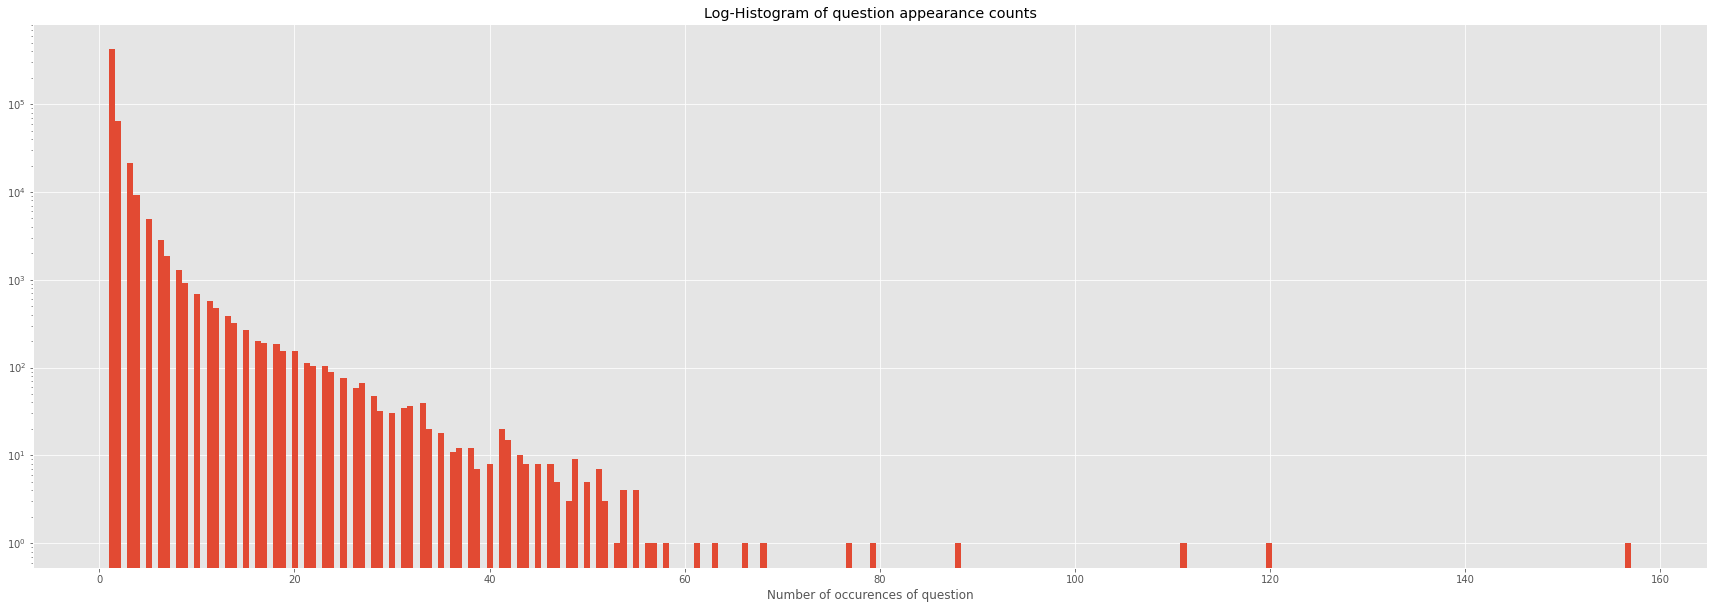

In [17]:
plt.figure(figsize=(30, 10))

plt.hist(qids.value_counts(), bins=250)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 


In [ ]:
df = df.drop(['id', 'qid1', 'qid2'], axis=1) # dropping irrelevant features

In [ ]:
df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
from tqdm import tqdm, tqdm_notebook

In [ ]:
tqdm.pandas()

### Train-Test-Split

In [ ]:
y = df['is_duplicate']
X = df[['question1','question2']]

In [ ]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 5.2 MB/s 
     |████████████████████████████████| 106 kB 64.7 MB/s 


## ***Text Preprocessing***

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import contractions
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [ ]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [ ]:
def pre_process(raw_text,flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # remove html tags
    #sentence=re.compile(r'<[^>]+>').sub('', sentence)

    # Expanding contractions
    
    expanded_words = []   
    for word in sentence.split():
        expanded_words.append(contractions.fix(word))  
   
        sentence = ' '.join(expanded_words)
    
    
    # remove stop words                
    clean_tokens = [t for t in sentence.split() if not t in stopwords.words("english")]

    # Stemming/Lemmatization and POS tagging
    if(flag == 'stem'):
        token_list=[]
        for word, tag in pos_tag(clean_tokens):
            wntag = tag[0].lower()
            wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
    
            stem = stemmer.stem(word, wntag) if wntag else word
            token_list.append(stem)

    else:
        token_list=[]
        for word, tag in pos_tag(clean_tokens):
            wntag = tag[0].lower()
            wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None  
    
            lemma = lemmatizer.lemmatize(word, wntag) if wntag else word
            token_list.append(lemma)
     
    return pd.Series([" ".join(token_list)])

# ***Pre-processing of Train data***

## ***Applying Stemming on X_train data***

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from tqdm import tqdm, tqdm_notebook
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [ ]:
X_train['question1']=X_train['question1'].progress_apply(str)
temp_dfs = X_train['question1'].progress_apply(lambda x: pre_process(x, 'stem'))


100%|██████████| 323429/323429 [14:22<00:00, 374.96it/s]


In [ ]:
temp_dfs.columns = ['question1_cleaned_stem', 'question1_cleaned_stem_len']
X_train = pd.concat([X_train, temp_dfs], axis=1)
X_train.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len
174950,India: What are job options and future options...,Jobs and Careers in India: I am currently in m...,india job option futur option low cgpa graduat...,12
119443,Which is world's best romantic movie?,What is the best romantic movie of all time?,world best romantic movi,4
252943,Which is best place to live in hyderabad?,Which is best place to live Hyderabad or Mumbai?,best place live hyderabad,4
13551,What should I do to be an athlete in a month?,What is shop act licence?,athlete month,2
274898,How do you learn to code on WordPress?,In how much time can I learn to code a WordPre...,learn code wordpress,3


In [ ]:
X_train['question2']=X_train['question2'].progress_apply(str)
temp_dfL = X_train['question2'].progress_apply(lambda x: pre_process(x, 'stem'))


100%|██████████| 323429/323429 [14:10<00:00, 380.20it/s]


In [ ]:
temp_dfL.columns = ['question2_cleaned_stem', 'question2_cleaned_stem_len']
X_train = pd.concat([X_train, temp_dfL], axis=1)
X_train.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len
174950,India: What are job options and future options...,Jobs and Careers in India: I am currently in m...,india job option futur option low cgpa graduat...,12,job career india current third year engin cgpa...,28
119443,Which is world's best romantic movie?,What is the best romantic movie of all time?,world best romantic movi,4,best romantic movi time,4
252943,Which is best place to live in hyderabad?,Which is best place to live Hyderabad or Mumbai?,best place live hyderabad,4,best place live hyderabad mumbai,5
13551,What should I do to be an athlete in a month?,What is shop act licence?,athlete month,2,shop act licenc,3
274898,How do you learn to code on WordPress?,In how much time can I learn to code a WordPre...,learn code wordpress,3,much time learn code wordpress websit,6


## ***Applying Lemmatization on X_train data***

In [ ]:
temp_dfL = X_train['question1'].progress_apply(lambda x: pre_process(x, 'lemma'))

100%|██████████| 323429/323429 [12:59<00:00, 414.86it/s]


In [ ]:
temp_dfL.columns = ['question1_cleaned_lemma', 'question1_cleaned_lemma_len']
X_train = pd.concat([X_train, temp_dfL], axis=1)
X_train.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len
174950,India: What are job options and future options...,Jobs and Careers in India: I am currently in m...,india job option futur option low cgpa graduat...,12,job career india current third year engin cgpa...,28,india job option future option low cgpa gradua...,12
119443,Which is world's best romantic movie?,What is the best romantic movie of all time?,world best romantic movi,4,best romantic movi time,4,world best romantic movie,4
252943,Which is best place to live in hyderabad?,Which is best place to live Hyderabad or Mumbai?,best place live hyderabad,4,best place live hyderabad mumbai,5,best place live hyderabad,4
13551,What should I do to be an athlete in a month?,What is shop act licence?,athlete month,2,shop act licenc,3,athlete month,2
274898,How do you learn to code on WordPress?,In how much time can I learn to code a WordPre...,learn code wordpress,3,much time learn code wordpress websit,6,learn code wordpress,3


In [ ]:
temp_dfL = X_train['question2'].progress_apply(lambda x: pre_process(x, 'lemma'))

100%|██████████| 323429/323429 [13:11<00:00, 408.40it/s]


In [ ]:
temp_dfL.columns = ['question2_cleaned_lemma', 'question2_cleaned_lemma_len']
X_train = pd.concat([X_train, temp_dfL], axis=1)
X_train.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len,question2_cleaned_lemma,question2_cleaned_lemma_len
174950,India: What are job options and future options...,Jobs and Careers in India: I am currently in m...,india job option futur option low cgpa graduat...,12,job career india current third year engin cgpa...,28,india job option future option low cgpa gradua...,12,job career india currently third year engineer...,28
119443,Which is world's best romantic movie?,What is the best romantic movie of all time?,world best romantic movi,4,best romantic movi time,4,world best romantic movie,4,best romantic movie time,4
252943,Which is best place to live in hyderabad?,Which is best place to live Hyderabad or Mumbai?,best place live hyderabad,4,best place live hyderabad mumbai,5,best place live hyderabad,4,best place live hyderabad mumbai,5
13551,What should I do to be an athlete in a month?,What is shop act licence?,athlete month,2,shop act licenc,3,athlete month,2,shop act licence,3
274898,How do you learn to code on WordPress?,In how much time can I learn to code a WordPre...,learn code wordpress,3,much time learn code wordpress websit,6,learn code wordpress,3,much time learn code wordpress website,6


# ***Pre-processing of Test data***

## ***Applying Stemming on X_test data***

In [ ]:
X_test['question1']=X_test['question1'].progress_apply(str)
temp_df = X_test['question1'].progress_apply(lambda x: pre_process(x, 'stem'))

100%|██████████| 80858/80858 [03:28<00:00, 387.61it/s]


In [ ]:
temp_df.columns = ['question1_cleaned_stem', 'question1_cleaned_stem_len']
X_test = pd.concat([X_test, temp_df], axis=1)
X_test.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,play pok mon go korea,5
224279,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,breath treatment help cough,4
252452,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,kellyann conway annoy opinion,4
174039,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,rate review maruti baleno,4
384863,What are some good books on marketing?,What are some of the best books ever written a...,good book market,3


In [ ]:
X_test['question2']=X_test['question2'].progress_apply(str)
temp_df = X_test['question2'].progress_apply(lambda x: pre_process(x, 'stem'))

100%|██████████| 80858/80858 [03:31<00:00, 381.62it/s]


In [ ]:
temp_df.columns = ['question2_cleaned_stem', 'question2_cleaned_stem_len']
X_test = pd.concat([X_test, temp_df], axis=1)
X_test.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,play pok mon go korea,5,play pok mon go china,5
224279,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,breath treatment help cough,4,help someon unconscious still breath,5
252452,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,kellyann conway annoy opinion,4,kellyann conway realli imply pay attent word c...,11
174039,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,rate review maruti baleno,4,career option one complet bachelor degree dist...,12
384863,What are some good books on marketing?,What are some of the best books ever written a...,good book market,3,best book ever written market,5


## ***Applying Lemmatization on X_test data***

In [ ]:
temp_df = X_test['question1'].progress_apply(lambda x: pre_process(x, 'lemma'))

100%|██████████| 80858/80858 [03:16<00:00, 411.23it/s]


In [ ]:
temp_df.columns = ['question1_cleaned_lemma', 'question1_cleaned_lemma_len']
X_test = pd.concat([X_test, temp_df], axis=1)
X_test.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,play pok mon go korea,5,play pok mon go china,5,play pok mon go korea,5
224279,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,breath treatment help cough,4,help someon unconscious still breath,5,breathe treatment help cough,4
252452,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,kellyann conway annoy opinion,4,kellyann conway realli imply pay attent word c...,11,kellyanne conway annoy opinion,4
174039,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,rate review maruti baleno,4,career option one complet bachelor degree dist...,12,rate review maruti baleno,4
384863,What are some good books on marketing?,What are some of the best books ever written a...,good book market,3,best book ever written market,5,good book market,3


In [ ]:
temp_df = X_test['question2'].progress_apply(lambda x: pre_process(x, 'lemma'))

100%|██████████| 80858/80858 [03:17<00:00, 409.80it/s]


In [ ]:
temp_df.columns = ['question2_cleaned_lemma', 'question2_cleaned_lemma_len']
X_test = pd.concat([X_test, temp_df], axis=1)
X_test.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len,question2_cleaned_lemma,question2_cleaned_lemma_len
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,play pok mon go korea,5,play pok mon go china,5,play pok mon go korea,5,play pok mon go china,5
224279,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,breath treatment help cough,4,help someon unconscious still breath,5,breathe treatment help cough,4,help someone unconscious still breathe,5
252452,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,kellyann conway annoy opinion,4,kellyann conway realli imply pay attent word c...,11,kellyanne conway annoy opinion,4,kellyanne conway really imply pay attention wo...,11
174039,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,rate review maruti baleno,4,career option one complet bachelor degree dist...,12,rate review maruti baleno,4,career option one complete bachelor degree dis...,12
384863,What are some good books on marketing?,What are some of the best books ever written a...,good book market,3,best book ever written market,5,good book market,3,best book ever write marketing,5


In [ ]:
X_test.isnull().sum()

question1                      0
question2                      0
question1_cleaned_stem         0
question1_cleaned_stem_len     0
question2_cleaned_stem         0
question2_cleaned_stem_len     0
question1_cleaned_lemma        0
question1_cleaned_lemma_len    0
question2_cleaned_lemma        0
question2_cleaned_lemma_len    0
dtype: int64

In [ ]:
X_train.head(1)

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len,question2_cleaned_lemma,question2_cleaned_lemma_len
174950,India: What are job options and future options...,Jobs and Careers in India: I am currently in m...,india job option futur option low cgpa graduat...,12,job career india current third year engin cgpa...,28,india job option future option low cgpa gradua...,12,job career india currently third year engineer...,28


In [ ]:
X_test.sample(1)

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len,question2_cleaned_lemma,question2_cleaned_lemma_len
21191,Is there any hockey club or coaching in Raipur...,"Is there any hockey club in Raipur, Chhattisgarh?",hockey club coach raipur chhattisgarh,5,hockey club raipur chhattisgarh,4,hockey club coach raipur chhattisgarh,5,hockey club raipur chhattisgarh,4


## ***Saving file to easy access***

In [ ]:
# X_train.to_csv('X_trainV.csv')
# X_test.to_csv('X_testV.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_train = pd.read_csv('/content/grive/MyDrive/Colab Notebooks/Quora_similarity_nlp_Indramani/X_trainV.csv')
X_test = pd.read_csv('/content/grive/MyDrive/Colab Notebooks/Quora_similarity_nlp_Indramani/X_testV.csv')

In [ ]:
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
X_train.head(1)

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len,question2_cleaned_lemma,question2_cleaned_lemma_len
0,India: What are job options and future options...,Jobs and Careers in India: I am currently in m...,india job option futur option low cgpa graduat...,12,job career india current third year engin cgpa...,28,india job option future option low cgpa gradua...,12,job career india currently third year engineer...,28


In [ ]:
X_test.head(1)

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len,question2_cleaned_lemma,question2_cleaned_lemma_len
0,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,play pok mon go korea,5,play pok mon go china,5,play pok mon go korea,5,play pok mon go china,5


In [ ]:
X_train.columns

Index(['question1', 'question2', 'question1_cleaned_stem',
       'question1_cleaned_stem_len', 'question2_cleaned_stem',
       'question2_cleaned_stem_len', 'question1_cleaned_lemma',
       'question1_cleaned_lemma_len', 'question2_cleaned_lemma',
       'question2_cleaned_lemma_len'],
      dtype='object')

## ***Concatinating question1 and question2 columns***

In [ ]:
X_train['q1_q2_combined'] = (X_train.question1_cleaned_lemma +' '+ X_train.question2_cleaned_lemma)

X_test['q1_q2_combined'] = (X_test.question1_cleaned_lemma +' '+ X_test.question2_cleaned_lemma)

In [ ]:
X_train.isnull().sum()

question1                        0
question2                        0
question1_cleaned_stem         143
question1_cleaned_stem_len       0
question2_cleaned_stem         136
question2_cleaned_stem_len       0
question1_cleaned_lemma        143
question1_cleaned_lemma_len      0
question2_cleaned_lemma        136
question2_cleaned_lemma_len      0
q1_q2_combined                 222
dtype: int64

In [ ]:
X_test.isnull().sum()

question1                       0
question2                       0
question1_cleaned_stem         35
question1_cleaned_stem_len      0
question2_cleaned_stem         41
question2_cleaned_stem_len      0
question1_cleaned_lemma        35
question1_cleaned_lemma_len     0
question2_cleaned_lemma        41
question2_cleaned_lemma_len     0
q1_q2_combined                 59
dtype: int64

In [ ]:
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

In [ ]:
print(X_train.isnull().sum())
print()
print(X_test.isnull().sum())

question1                      0
question2                      0
question1_cleaned_stem         0
question1_cleaned_stem_len     0
question2_cleaned_stem         0
question2_cleaned_stem_len     0
question1_cleaned_lemma        0
question1_cleaned_lemma_len    0
question2_cleaned_lemma        0
question2_cleaned_lemma_len    0
q1_q2_combined                 0
dtype: int64

question1                      0
question2                      0
question1_cleaned_stem         0
question1_cleaned_stem_len     0
question2_cleaned_stem         0
question2_cleaned_stem_len     0
question1_cleaned_lemma        0
question1_cleaned_lemma_len    0
question2_cleaned_lemma        0
question2_cleaned_lemma_len    0
q1_q2_combined                 0
dtype: int64


# ***Embedding Technique and Algo training with MLFlow(Experiment Tracking)***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report

from google.colab import output     #for beep alarm, i used to remind me once the cell is executed till then i can work on other things

# below is the code to run in the queue after the working cell
#output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

## ***MLFlow installation and Setup***

In [ ]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 5.1 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 209 kB 56.0 MB/s 
     |████████████████████████████████| 182 kB 70.8 MB/s 
     |████████████████████████████████| 147 kB 54.8 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 140 kB 50.0 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 60 kB 7.3 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.17.3-py3-none-any.whl size=139102 sha256=a9f442cf7f0147ae69186793fa533ea3aca965ad7f6508154b532faf6f335c53
  Stored in directory: /root/.cache/pip/wheels/3f/7

In [ ]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow_quora.db")
mlflow.set_experiment("Quora Questions Pair Similarity")

<Experiment: artifact_location='./mlruns/1', creation_time=1666075072662, experiment_id='1', last_update_time=1666075072662, lifecycle_stage='active', name='Quora Questions Pair Similarity', tags={}>

## ***Applying BOW***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vec = CountVectorizer()

#count_vec.fit(X_train.q1_q2_combined)

X_train_bow = count_vec.fit_transform(X_train.q1_q2_combined)
X_train_bow

<323429x63904 sparse matrix of type '<class 'numpy.int64'>'
	with 2510481 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_bow = count_vec.transform(X_test.q1_q2_combined)
X_test_bow

<80858x63904 sparse matrix of type '<class 'numpy.int64'>'
	with 621095 stored elements in Compressed Sparse Row format>

In [ ]:
count_vec.vocabulary_

{'india': 27161,
 'job': 29350,
 'option': 40337,
 'future': 21530,
 'low': 33078,
 'cgpa': 9309,
 'graduation': 23042,
 'percentage': 42248,
 'engineering': 17966,
 'student': 54254,
 'career': 8629,
 'currently': 13128,
 'third': 56787,
 'year': 63257,
 'one': 40045,
 'backlog': 4574,
 'semester': 50526,
 'decide': 13913,
 'want': 61565,
 'seek': 50422,
 'firm': 20237,
 'like': 32403,
 'mu': 37127,
 'sigma': 51608,
 'mba': 34724,
 'better': 5809,
 'company': 11261,
 'apply': 2932,
 'order': 40400,
 'get': 22246,
 'decent': 13903,
 'world': 62731,
 'best': 5761,
 'romantic': 48606,
 'movie': 36963,
 'time': 57060,
 'place': 43195,
 'live': 32658,
 'hyderabad': 25924,
 'mumbai': 37302,
 'athlete': 3838,
 'month': 36674,
 'shop': 51329,
 'act': 552,
 'licence': 32289,
 'learn': 31876,
 'code': 10773,
 'wordpress': 62688,
 'much': 37136,
 'website': 61891,
 'type': 58589,
 'crime': 12708,
 'fbi': 19686,
 'subject': 54398,
 'matter': 34623,
 'jurisdiction': 29649,
 'girl': 22468,
 'think'

### ***Logistic Regression***

In [ ]:
# lr = LogisticRegression(max_iter=500)
# lr.fit(X_train_bow, y_train)
# y_pred_train = lr.predict(X_train_bow)

# print()
# print(classification_report(y_train, y_pred_train))

# print()
# y_pred_test = lr.predict(X_test_bow)
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "Logistic")
    mlflow.set_tag("ET", "Bow")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    max_iter=1000
    mlflow.log_param("max_iter", max_iter)
    lr_classifier = LogisticRegression(max_iter=max_iter)
    lr_classifier.fit(X_train_bow, y_train)
    y_test_pred = lr_classifier.predict(X_test_bow)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = lr_classifier.score(X_train_bow, y_train)
    test_score = lr_classifier.score(X_test_bow, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)

    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.784512211335409
0.7469514457443914


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     51026
           1       0.68      0.59      0.63     29832

    accuracy                           0.75     80858
   macro avg       0.73      0.71      0.72     80858
weighted avg       0.74      0.75      0.74     80858



### ***Decision Tree Classifier***

In [ ]:
# dtc = DecisionTreeClassifier()
# dtc.fit(X_train_bow, y_train)
# y_pred_train = dtc.predict(X_train_bow)

# print(classification_report(y_train, y_pred_train))
# print()
# y_pred_test = dtc.predict(X_test_bow)
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "DecisionTree")
    mlflow.set_tag("ET", "Bow")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    #Maximum tree depth is a limit to stop further splitting of nodes when the specified tree depth has been reached during the building of the initial decision tree
    depth = 200
    mlflow.log_param("max_depth", depth)
    dt_classifier = DecisionTreeClassifier(max_depth = depth)
    dt_classifier.fit(X_train_bow, y_train)
    y_test_pred = dt_classifier.predict(X_test_bow)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = dt_classifier.score(X_train_bow, y_train)
    test_score = dt_classifier.score(X_test_bow, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.8942240800917667
0.7665289767246284


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83     51026
           1       0.75      0.55      0.64     29832

    accuracy                           0.77     80858
   macro avg       0.76      0.72      0.73     80858
weighted avg       0.76      0.77      0.76     80858



### ***Random Forest Classifier***

In [ ]:
# rfc = RandomForestClassifier()
# rfc.fit(X_train_bow, y_train)
# y_pred_train = rfc.predict(X_train_bow)

# print(classification_report(y_train, y_pred_train))

# y_pred_test = rfc.predict(X_test_bow)
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "RF")
    mlflow.set_tag("ET", "Bow")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")

    n_estimators= 50
    # max_depth = 50

    mlflow.log_param("n_estimators", n_estimators)
    # mlflow.log_param("max_depth", max_depth)

    rf_classifier = RandomForestClassifier(n_estimators=n_estimators)

    rf_classifier.fit(X_train_bow, y_train)
    y_test_pred = rf_classifier.predict(X_test_bow)

    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = rf_classifier.score(X_train_bow, y_train)
    test_score = rf_classifier.score(X_test_bow, y_test)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)

    mlflow.sklearn.log_model(rf_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.9935781887214814
0.8160973558584185


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     51026
           1       0.77      0.71      0.74     29832

    accuracy                           0.82     80858
   macro avg       0.81      0.79      0.80     80858
weighted avg       0.81      0.82      0.81     80858



### ***XGBoost***

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "XGB")
    mlflow.set_tag("ET", "Bow")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    #Maximum tree depth is a limit to stop further splitting of nodes when the specified tree depth has been reached during the building of the initial decision tree
    depth = 150
    n_estimators=200
    objective='binary:logistic'

    mlflow.log_param("max_depth", depth)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("objective", objective)
   
    xgb_classifier = xgb.XGBClassifier(max_depth=depth, n_estimators=n_estimators,objective=objective)
    xgb_classifier.fit(X_train_bow, y_train)

    y_test_pred = xgb_classifier.predict(X_test_bow)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = xgb_classifier.score(X_train_bow, y_train)
    test_score = xgb_classifier.score(X_test_bow, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.9106264435161967
0.823826955897994


In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "XGB")
    mlflow.set_tag("ET", "Bow")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    #Maximum tree depth is a limit to stop further splitting of nodes when the specified tree depth has been reached during the building of the initial decision tree
    depth = 70
    n_estimators=100
    objective='binary:logistic'

    mlflow.log_param("max_depth", depth)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("objective", objective)
   
    xgb_classifier = xgb.XGBClassifier(max_depth=depth, n_estimators=n_estimators,objective=objective)
    # xgb_classifier = xgb.XGBClassifier()
    xgb_classifier.fit(X_train_bow, y_train)

    y_test_pred = xgb_classifier.predict(X_test_bow)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = xgb_classifier.score(X_train_bow, y_train)
    test_score = xgb_classifier.score(X_test_bow, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.8478522334113515
0.7938484751045042


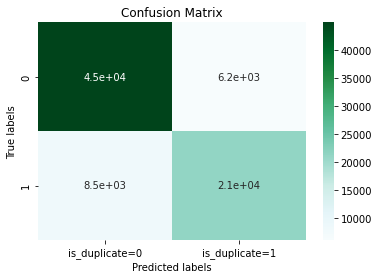

In [ ]:
------------------ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, ax = ax, cmap = "BuGn")

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["is_duplicate=0", "is_duplicate=1"])

## ***Applying TFIDF Vectorizer***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.q1_q2_combined)
X_train_tfidf

<323429x63904 sparse matrix of type '<class 'numpy.float64'>'
	with 2510481 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf = tfidf_vectorizer.transform(X_test.q1_q2_combined)
X_test_tfidf

<80858x63904 sparse matrix of type '<class 'numpy.float64'>'
	with 621095 stored elements in Compressed Sparse Row format>

### ***Logistic Regression***

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(max_iter=500)
# lr.fit(X_train_tfidf, y_train)
# y_pred_train = lr.predict(X_train_tfidf)

# from sklearn.metrics import classification_report
# print(classification_report(y_train, y_pred_train))

# y_pred_test = lr.predict(X_test_tfidf)
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "Logistic")
    mlflow.set_tag("ET", "tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    max_iter=500
    mlflow.log_param("max_iter", max_iter)
    lr_classifier = LogisticRegression(max_iter=max_iter)
    lr_classifier.fit(X_train_tfidf, y_train)
    y_test_pred = lr_classifier.predict(X_test_tfidf)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = lr_classifier.score(X_train_tfidf, y_train)
    test_score = lr_classifier.score(X_test_tfidf, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)

    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.769559934328709
0.74843552895199


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81     51026
           1       0.71      0.53      0.61     29832

    accuracy                           0.75     80858
   macro avg       0.74      0.70      0.71     80858
weighted avg       0.74      0.75      0.74     80858



### ***Decision Tree Classifier***

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# dtc = DecisionTreeClassifier()
# dtc.fit(X_train_tfidf, y_train)
# y_pred_train = dtc.predict(X_train_tfidf)

# print(classification_report(y_train, y_pred_train))

# y_pred_test = dtc.predict(X_test_tfidf)
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "DecisionTree")
    mlflow.set_tag("ET", "tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    #Maximum tree depth is a limit to stop further splitting of nodes when the specified tree depth has been reached during the building of the initial decision tree
    depth = 200
    mlflow.log_param("max_depth", depth)
    dt_classifier = DecisionTreeClassifier(max_depth = depth)
    dt_classifier.fit(X_train_tfidf, y_train)
    y_test_pred = dt_classifier.predict(X_test_tfidf)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = dt_classifier.score(X_train_tfidf, y_train)
    test_score = dt_classifier.score(X_test_tfidf, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.8990412115178292
0.7530980236958619


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82     51026
           1       0.72      0.54      0.62     29832

    accuracy                           0.75     80858
   macro avg       0.74      0.71      0.72     80858
weighted avg       0.75      0.75      0.74     80858



### ***Random Forest Classifier***

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# rfc.fit(X_train_tfidf, y_train)
# y_pred_train = rfc.predict(X_train_tfidf)

# print(classification_report(y_train, y_pred_train))

# y_pred_test = rfc.predict(X_test_tfidf)
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "RF")
    mlflow.set_tag("ET", "tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")

    n_estimators= 50
    # max_depth = 50

    mlflow.log_param("n_estimators", n_estimators)
    # mlflow.log_param("max_depth", max_depth)

    rf_classifier = RandomForestClassifier(n_estimators=n_estimators)

    rf_classifier.fit(X_train_tfidf, y_train)
    y_test_pred = rf_classifier.predict(X_test_tfidf)

    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = rf_classifier.score(X_train_tfidf, y_train)
    test_score = rf_classifier.score(X_test_tfidf, y_test)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)

    mlflow.sklearn.log_model(rf_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.9934978001354239
0.8113730243142299


In [ ]:
print(classification_report(y_test, y_test_pred))z

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     51026
           1       0.78      0.68      0.73     29832

    accuracy                           0.81     80858
   macro avg       0.80      0.78      0.79     80858
weighted avg       0.81      0.81      0.81     80858



In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# ax= plt.subplot()
# sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, ax = ax, cmap = "BuGn")

# # labels, title and ticks
# ax.set_xlabel("Predicted labels")
# ax.set_ylabel("True labels"); 
# ax.set_title("Confusion Matrix")
# ax.xaxis.set_ticklabels(["is_duplicate=0", "is_duplicate=1"])

### ***XGBoost***

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "XGB")
    mlflow.set_tag("ET", "tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    #Maximum tree depth is a limit to stop further splitting of nodes when the specified tree depth has been reached during the building of the initial decision tree
    depth = 150
    n_estimators=200
    objective='binary:logistic'

    mlflow.log_param("max_depth", depth)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("objective", objective)
   
    xgb_classifier = xgb.XGBClassifier(max_depth=depth, n_estimators=n_estimators,objective=objective)
    xgb_classifier.fit(X_train_tfidf, y_train)

    y_test_pred = xgb_classifier.predict(X_test_tfidf)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = xgb_classifier.score(X_train_tfidf, y_train)
    test_score = xgb_classifier.score(X_test_tfidf, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.9512721493743603
0.8037299957950976


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     51026
           1       0.78      0.65      0.71     29832

    accuracy                           0.80     80858
   macro avg       0.80      0.77      0.78     80858
weighted avg       0.80      0.80      0.80     80858



# ***Applying Word2Vector***

In [ ]:
!pip install gensim==4.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim
gensim.__version__

'4.2.0'

In [ ]:
X_train['q1_q2_combined_list'] = [i.split() for i in X_train.q1_q2_combined]
X_train.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len,question2_cleaned_lemma,question2_cleaned_lemma_len,q1_q2_combined,q1_q2_combined_list
0,India: What are job options and future options...,Jobs and Careers in India: I am currently in m...,india job option futur option low cgpa graduat...,12,job career india current third year engin cgpa...,28,india job option future option low cgpa gradua...,12,job career india currently third year engineer...,28,india job option future option low cgpa gradua...,"[india, job, option, future, option, low, cgpa..."
1,Which is world's best romantic movie?,What is the best romantic movie of all time?,world best romantic movi,4,best romantic movi time,4,world best romantic movie,4,best romantic movie time,4,world best romantic movie best romantic movie ...,"[world, best, romantic, movie, best, romantic,..."
2,Which is best place to live in hyderabad?,Which is best place to live Hyderabad or Mumbai?,best place live hyderabad,4,best place live hyderabad mumbai,5,best place live hyderabad,4,best place live hyderabad mumbai,5,best place live hyderabad best place live hyde...,"[best, place, live, hyderabad, best, place, li..."
3,What should I do to be an athlete in a month?,What is shop act licence?,athlete month,2,shop act licenc,3,athlete month,2,shop act licence,3,athlete month shop act licence,"[athlete, month, shop, act, licence]"
4,How do you learn to code on WordPress?,In how much time can I learn to code a WordPre...,learn code wordpress,3,much time learn code wordpress websit,6,learn code wordpress,3,much time learn code wordpress website,6,learn code wordpress much time learn code word...,"[learn, code, wordpress, much, time, learn, co..."


In [ ]:
X_test['q1_q2_combined_list'] = X_test.q1_q2_combined.apply(lambda x: x.split())
X_test.head()

,question1,question2,question1_cleaned_stem,question1_cleaned_stem_len,question2_cleaned_stem,question2_cleaned_stem_len,question1_cleaned_lemma,question1_cleaned_lemma_len,question2_cleaned_lemma,question2_cleaned_lemma_len,q1_q2_combined,q1_q2_combined_list
0,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,play pok mon go korea,5,play pok mon go china,5,play pok mon go korea,5,play pok mon go china,5,play pok mon go korea play pok mon go china,"[play, pok, mon, go, korea, play, pok, mon, go..."
1,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,breath treatment help cough,4,help someon unconscious still breath,5,breathe treatment help cough,4,help someone unconscious still breathe,5,breathe treatment help cough help someone unco...,"[breathe, treatment, help, cough, help, someon..."
2,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,kellyann conway annoy opinion,4,kellyann conway realli imply pay attent word c...,11,kellyanne conway annoy opinion,4,kellyanne conway really imply pay attention wo...,11,kellyanne conway annoy opinion kellyanne conwa...,"[kellyanne, conway, annoy, opinion, kellyanne,..."
3,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,rate review maruti baleno,4,career option one complet bachelor degree dist...,12,rate review maruti baleno,4,career option one complete bachelor degree dis...,12,rate review maruti baleno career option one co...,"[rate, review, maruti, baleno, career, option,..."
4,What are some good books on marketing?,What are some of the best books ever written a...,good book market,3,best book ever written market,5,good book market,3,best book ever write marketing,5,good book market best book ever write marketing,"[good, book, market, best, book, ever, write, ..."


In [ ]:
from gensim.models import Word2Vec

In [ ]:
word_vec = Word2Vec(list(X_train.q1_q2_combined_list), vector_size=25, min_count=1)

In [ ]:
word_vec.wv.similar_by_word('india')

[('nepal', 0.8142632246017456),
 ('bangladesh', 0.7891553640365601),
 ('pakistan', 0.7858508825302124),
 ('government', 0.7693788409233093),
 ('usa', 0.7685715556144714),
 ('indian', 0.7561608552932739),
 ('govt', 0.7466481924057007),
 ('overseas', 0.7237700819969177),
 ('aircrarft', 0.7148021459579468),
 ('australia', 0.7070310711860657)]

In [ ]:
# Checking the shape of vectors learned by the model

print(word_vec.wv.__getitem__(word_vec.wv.index_to_key).shape)

(63928, 25)


In [ ]:
# Converting word vector to document vector this document vector is used to train ML models.

def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    if len(vocab_tokens)!=0:
        return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)
    
    else:
        return np.zeros(25)

In [ ]:
X_train['doc_vector'] = X_train.q1_q2_combined_list.progress_apply(lambda x: document_vector(x, word_vec.wv))

100%|██████████| 323429/323429 [07:01<00:00, 767.95it/s]


In [ ]:
X_test['doc_vector'] = X_test.q1_q2_combined_list.progress_apply(lambda x: document_vector(x, word_vec.wv))

100%|██████████| 80858/80858 [02:01<00:00, 667.95it/s]


In [ ]:
X_train_w2v = list(X_train.doc_vector)
X_test_w2v = list(X_test.doc_vector)

In [ ]:
X_train_w2v

[array([-1.6492065 , -0.10971253,  1.7647998 , -1.7417881 , -0.6257716 ,
        -0.5621172 , -0.20976305,  1.6266644 , -0.4909129 , -0.1577321 ,
        -0.37475806,  1.2335557 ,  0.09692426, -2.1327498 , -0.5326528 ,
         0.7840301 ,  2.3347926 ,  0.62077826, -0.6295821 ,  2.495222  ,
         0.20529422,  0.6642685 , -1.0506703 ,  0.21141753,  0.02238489],
       dtype=float32),
 array([-1.5373952e+00, -4.2220896e-01,  1.6863526e-01, -1.2247490e+00,
         1.8534103e-01, -8.4882593e-01, -1.9517251e+00,  9.1404384e-01,
        -5.6868792e-04, -2.3219886e-01,  1.5353218e+00,  5.2219242e-02,
         1.0447726e+00,  1.4307436e+00, -2.1448019e+00,  2.2128193e+00,
         2.1342502e+00,  2.5826249e+00,  1.6881678e-01,  2.4590239e-01,
        -5.0577712e-01, -7.3913348e-01,  5.9164330e-02,  1.4508394e+00,
        -6.8833542e-01], dtype=float32),
 array([-2.2264547 ,  1.6751895 ,  0.63649875, -1.6685072 , -0.48335192,
        -0.72501177,  0.04520928,  2.377589  ,  0.18461701, -0.23

### ***Logistic Regression***

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(X_train_w2v, y_train)
# y_pred_train = lr.predict(X_train_w2v)
# y_pred_test = lr.predict(X_test_w2v)

# from sklearn.metrics import classification_report
# print('Classification Report for train data')
# print(classification_report(y_train, y_pred_train))
# print('Classification Report for test data')
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "Logistic")
    mlflow.set_tag("ET", "w2v")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    max_iter=1000
    mlflow.log_param("max_iter", max_iter)
    lr_classifier = LogisticRegression(max_iter=max_iter)
    lr_classifier.fit(X_train_w2v, y_train)
    y_test_pred = lr_classifier.predict(X_test_w2v)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = lr_classifier.score(X_train_w2v, y_train)
    test_score = lr_classifier.score(X_test_w2v, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)

    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.7098683173123004
0.7078334858641074


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79     51026
           1       0.67      0.42      0.51     29832

    accuracy                           0.71     80858
   macro avg       0.69      0.65      0.65     80858
weighted avg       0.70      0.71      0.69     80858



### ***Decision Tree Classifier***

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# dtc = DecisionTreeClassifier()
# dtc.fit(X_train_w2v, y_train)
# y_pred_train = dtc.predict(X_train_w2v)
# y_pred_test = dtc.predict(X_test_w2v)

# from sklearn.metrics import classification_report
# print('Classification Report for train data')
# print(classification_report(y_train, y_pred_train))
# print('Classification Report for test data')
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "DecisionTree")
    mlflow.set_tag("ET", "w2v")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    #Maximum tree depth is a limit to stop further splitting of nodes when the specified tree depth has been reached during the building of the initial decision tree
    depth = 100
    mlflow.log_param("max_depth", depth)
    dt_classifier = DecisionTreeClassifier(max_depth = depth)
    dt_classifier.fit(X_train_w2v, y_train)
    y_test_pred = dt_classifier.predict(X_test_w2v)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = dt_classifier.score(X_train_w2v, y_train)
    test_score = dt_classifier.score(X_test_w2v, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.9952261547356607
0.7141284721363378


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     51026
           1       0.61      0.63      0.62     29832

    accuracy                           0.71     80858
   macro avg       0.69      0.70      0.69     80858
weighted avg       0.72      0.71      0.72     80858



### ***Random Forest Classifier***

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# rfc.fit(X_train_w2v, y_train)
# y_pred_train = rfc.predict(X_train_w2v)
# y_pred_test = rfc.predict(X_test_w2v)

# from sklearn.metrics import classification_report
# print('Classification Report for train data')
# print(classification_report(y_train, y_pred_train))
# print('Classification Report for test data')
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "RF")
    mlflow.set_tag("ET", "w2v")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")

    n_estimators= 100
    # max_depth = 50

    mlflow.log_param("n_estimators", n_estimators)
    # mlflow.log_param("max_depth", max_depth)

    rf_classifier = RandomForestClassifier(n_estimators=n_estimators)

    rf_classifier.fit(X_train_w2v, y_train)
    y_test_pred = rf_classifier.predict(X_test_w2v)

    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = rf_classifier.score(X_train_w2v, y_train)
    test_score = rf_classifier.score(X_test_w2v, y_test)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)

    mlflow.sklearn.log_model(rf_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.9952199709982716
0.7947760271092532


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     51026
           1       0.79      0.60      0.68     29832

    accuracy                           0.79     80858
   macro avg       0.79      0.75      0.77     80858
weighted avg       0.79      0.79      0.79     80858



In [ ]:
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

# ***Glove Pretrained Model***

In [ ]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

# list of pretrained models
print(list(gensim.downloader.info()['models'].keys()))

4.2.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv = api.load('glove-twitter-25')


[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
len(wv.__getitem__(['india'])[0])

In [ ]:
len(wv.index_to_key)

In [ ]:
X_train['doc_vector_pretrained_glove'] = X_train.q1_q2_combined_list.progress_apply(lambda x: document_vector(x, wv))
X_test['doc_vector_pretrained_glove'] = X_test.q1_q2_combined_list.progress_apply(lambda x: document_vector(x, wv))

100%|██████████| 80858/80858 [13:25<00:00, 100.42it/s]


### ***Glove Files***

In [ ]:
# X_train.to_csv('X_train_glove.csv')
# X_test.to_csv('X_test_glove.csv')

In [ ]:
X_train = pd.read_csv('/content/grive/MyDrive/Colab Notebooks/Quora_similarity_nlp_Indramani/X_train_glove.csv')
X_test = pd.read_csv('/content/grive/MyDrive/Colab Notebooks/Quora_similarity_nlp_Indramani/X_test_glove.csv')

In [ ]:
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
def processing(data):
    string = data.split()
    lst = [i.replace('[', '').replace(']', '') for i in string]
    if lst[0]=='':
        lst.pop(0)
        if lst[-1]=='':
            lst.pop(-1)

        elif lst[-1]== '':
            lst.pop(-1)

    return [float(i) for i in lst]

In [ ]:
X_train['updated'] = X_train.doc_vector_pretrained_glove.progress_apply(lambda x: processing(x))

100%|██████████| 323429/323429 [00:06<00:00, 49745.99it/s]


In [ ]:
X_train['len_updated'] = X_train.updated.progress_apply(lambda x: len(x))

100%|██████████| 323429/323429 [00:00<00:00, 794253.49it/s]


In [ ]:
X_test['updated'] = X_test.doc_vector_pretrained_glove.progress_apply(lambda x: processing(x))

100%|██████████| 80858/80858 [00:01<00:00, 53527.09it/s]


In [ ]:
X_test['len_updated'] = X_test.updated.progress_apply(lambda x: len(x))

100%|██████████| 80858/80858 [00:00<00:00, 735159.47it/s]


In [ ]:
# X_train_glove_pretrained = list(X_train.doc_vector_pretrained_glove)
# X_test_glove_pretrained = list(X_test.doc_vector_pretrained_glove)

X_train_glove = list(X_train.updated)
X_test_glove = list(X_test.updated)

### ***Logistics Regression***

In [ ]:
# lr = LogisticRegression()
# lr.fit(X_train_glove_pretrained, y_train)
# y_pred_train = lr.predict(X_train_glove_pretrained)
# y_pred_test = lr.predict(X_test_glove_pretrained)

# from sklearn.metrics import classification_report
# print('Classification Report for train data')
# print(classification_report(y_train, y_pred_train))
# print('Classification Report for test data')
# print(classification_report(y_test, y_pred_test))

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "Logistic")
    mlflow.set_tag("ET", "Glove")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    max_iter=1000
    mlflow.log_param("max_iter", max_iter)
    lr_classifier = LogisticRegression(max_iter=max_iter)
    lr_classifier.fit(X_train_glove, y_train)
    y_test_pred = lr_classifier.predict(X_test_glove)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = lr_classifier.score(X_train_glove, y_train)
    test_score = lr_classifier.score(X_test_glove, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)

    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.6471157502883168
0.6478888916371911


## ***Decision Tree***

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "DecisionTree")
    mlflow.set_tag("ET", "glove")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")
    #Maximum tree depth is a limit to stop further splitting of nodes when the specified tree depth has been reached during the building of the initial decision tree
    depth = 200
    mlflow.log_param("max_depth", depth)
    dt_classifier = DecisionTreeClassifier(max_depth = depth)
    dt_classifier.fit(X_train_glove, y_train)
    y_test_pred = dt_classifier.predict(X_test_glove)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = dt_classifier.score(X_train_glove, y_train)
    test_score = dt_classifier.score(X_test_glove, y_test)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.9937884357927087
0.6850280739073438


In [ ]:
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

## ***Random Forest***

In [ ]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Omkar")
    mlflow.set_tag("algo", "RF")
    mlflow.set_tag("ET", "glove")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/train.csv")

    n_estimators= 150
    max_depth = 100

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

    rf_classifier.fit(X_train_glove, y_train)
    y_test_pred = rf_classifier.predict(X_test_glove)

    acc = metrics.accuracy_score(y_test, y_test_pred)    
    train_score = rf_classifier.score(X_train_glove, y_train)
    test_score = rf_classifier.score(X_test_glove, y_test)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("Train Score", train_score)
    mlflow.log_metric("Test Score", test_score)

    mlflow.sklearn.log_model(rf_classifier, artifact_path="models")

In [ ]:
print(train_score)
print(test_score)

0.9937884357927087
0.7794157659106087


In [ ]:
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

## ***CONCLUSION:***
According to all the Experiments which we performed on different Vectorization Techniques such as BOW, TF-IDF, Word2Vec and Glove using different algorithms.
We observed that Logistic Regression algorithm on W2V  Vectorization Technique is giving the better accuracy compared to the rest of the models.

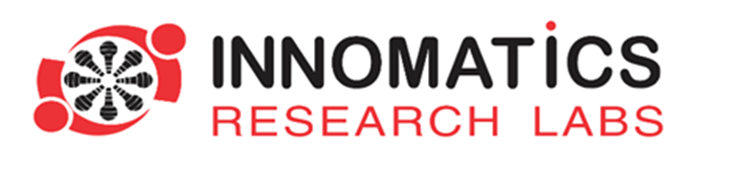